## Exploratory Data Analysis de Pokemons
Neste arquivo será explorado algumas propriedades dos pokemons até a geração 6.

### Preparo

##### Importando bibliotecas

In [196]:
import pandas as pd
from skimage.io import imread,imshow
import numpy as np
import matplotlib.pyplot as plt

Formatando float para só usar uma casa decimal

In [197]:
pd.options.display.float_format = '{:,.1f}'.format

A formatação foi feita direto nas opções de display do pandas pois só um dado que é float

Criando variavel com caminho para a pasta que contem as imagens dos sprites dos pokemons

In [198]:
imageFolderPath = "./pokemon"

##### Lendo csv

In [199]:
pokemonData = pd.read_csv("pokemon.csv")

##### Trocando N/A por - para melhor leitura

In [200]:
pokemonData.type_2 = pokemonData.type_2.fillna("-")

##### Dropando coluna não usada

In [201]:
pokemonData = pokemonData.drop('total',axis=1)

## Analise de dados

Primeiras colunas de exemplo do dataset para analisar a organização dos dados.

In [202]:
pokemonData.head()

,id,name,type_1,type_2,hp,attack,defense,sp_attack,sp._defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,-,39,52,43,60,50,65,1,False


Descrição basica do dataset

In [203]:
pokemonData.type_1.describe()

count       800
unique       18
top       Water
freq        112
Name: type_1, dtype: object

#### Dados de tipagem
mostra abaixo a quantidade de pokemons que correspondem a cada tipagem primaria.

In [204]:
pokemonTypeCount = pokemonData.type_1.value_counts()
pokemonTypeCount

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64

<AxesSubplot:>

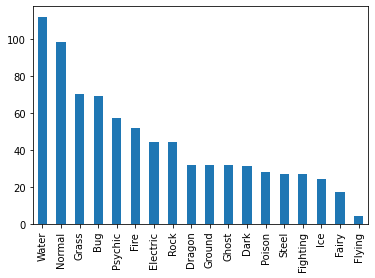

In [205]:
pokemonTypeCount.plot.bar()

Os mesmos dados de cima só que num grafico de barra para melhor visualização das quantias.

### Data correlation, como os dados se relacionam?

In [206]:
correlate = pokemonData.corr()

In [207]:
correlate = correlate*100

Transformar em porcentagem

correlate = correlate.drop('id',axis=1)
correlate = correlate.drop('id',axis=0)

Colunas de id são irrelevantes para correlação

In [208]:
correlate 

,id,hp,attack,defense,sp_attack,sp._defense,speed,generation,legendary
id,100.0,9.8,10.2,9.5,8.9,8.6,1.1,98.3,15.3
hp,9.8,100.0,42.2,24.0,36.2,37.9,17.6,5.9,27.4
attack,10.2,42.2,100.0,43.9,39.6,26.4,38.1,5.1,34.5
defense,9.5,24.0,43.9,100.0,22.4,51.1,1.5,4.2,24.6
sp_attack,8.9,36.2,39.6,22.4,100.0,50.6,47.3,3.6,44.9
sp._defense,8.6,37.9,26.4,51.1,50.6,100.0,25.9,2.8,36.4
speed,1.1,17.6,38.1,1.5,47.3,25.9,100.0,-2.3,32.7
generation,98.3,5.9,5.1,4.2,3.6,2.8,-2.3,100.0,8.0
legendary,15.3,27.4,34.5,24.6,44.9,36.4,32.7,8.0,100.0


Correlações notaveis:

ataque especial e defesa especial = 51.1%

velocidade e ataque especial = 47.3%

lendario e ataque especial = 44.9%

ataque e defesa = 43.9%

hp e ataque = 42.2%

geração e velocidade = -2.3%

#### Ranking dos pokemons com tipagem normal com maior ataque

In [209]:
normalPokemon = pokemonData.loc[(pokemonData.type_1=='Normal') | (pokemonData.type_2=='Normal')]
normalPokemonSortedByAttack = normalPokemon.sort_values(by=['attack'],ascending=False)
top10attacknormalPokemon = normalPokemonSortedByAttack.iloc[:10];

In [210]:
top10attacknormalPokemon.loc[:,['name','attack']]

,name,attack
313,Slaking,160
543,Regigigas,160
476,LopunnyMega Lopunny,136
235,Ursaring,130
716,MeloettaPirouette Forme,128
124,KangaskhanMega Kangaskhan,125
689,Braviary,123
552,Arceus,120
443,Staraptor,120
367,Zangoose,115


Pegar as imagens e gerar o ranking visual

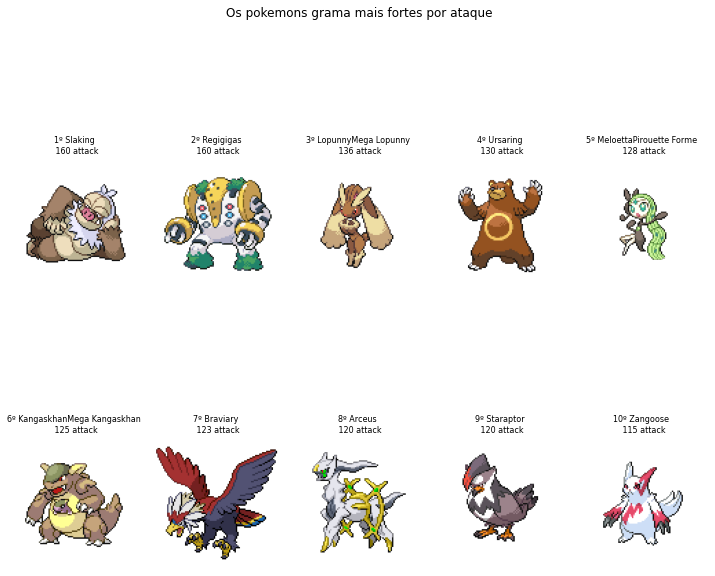

In [211]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10,10))
ax = axes.ravel()
plt.suptitle('Os pokemons grama mais fortes por ataque')

cont = 0
for index, row in top10attacknormalPokemon.iterrows():
    pokemonID = row['id']
    img = imread(f"{imageFolderPath}/{pokemonID}.png")
    ax[cont].imshow(img)
    ax[cont].set_title(f"{cont+1}º {row['name']} \n {row['attack']} attack", fontsize=8)
    cont+=1

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


Slaking, Regigigas, Mega Lopunny, Ursaring, Meloetta Pirouette, Mega Kangaskhan, Braviary, Arceus, Staraptor, Zangoose são os pokemons com tipagem normal mais fortes por ataque em ordem respectiva.

#### Ranking dos pokemons lendarios mais fortes baseado em DPS

In [212]:
legendaryPokemon = pokemonData.loc[pokemonData.legendary == True]
legendaryPokemonSortedByAttack = legendaryPokemon.sort_values(by=['attack','speed','sp_attack'],ascending=False)
top10LegendaryPokemon = legendaryPokemonSortedByAttack.iloc[:10];

In [213]:
top10LegendaryPokemon.loc[:,['name','attack','speed','sp_attack']]

,name,attack,speed,sp_attack
163,MewtwoMega Mewtwo X,190,130,154
429,DeoxysAttack Forme,180,150,180
426,RayquazaMega Rayquaza,180,115,180
424,GroudonPrimal Groudon,180,90,150
711,KyuremBlack Kyurem,170,95,120
796,DiancieMega Diancie,160,110,160
543,Regigigas,160,100,80
798,HoopaHoopa Unbound,160,80,170
428,DeoxysNormal Forme,150,150,150
164,MewtwoMega Mewtwo Y,150,140,194


Pegar as imagens e gerar o ranking visual

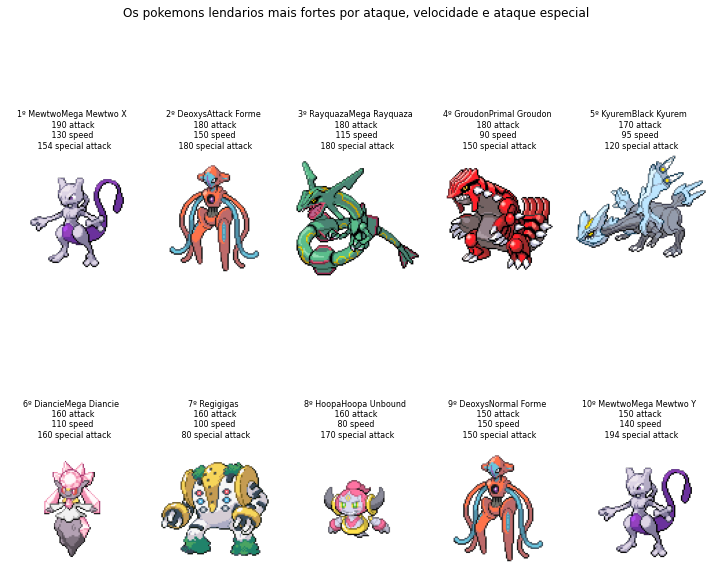

In [214]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10,10))
ax = axes.ravel()
plt.suptitle('Os pokemons lendarios mais fortes por ataque, velocidade e ataque especial')

cont = 0
for index, row in top10LegendaryPokemon.iterrows():
    pokemonID = row['id']
    img = imread(f"{imageFolderPath}/{pokemonID}.png")
    ax[cont].imshow(img)
    ax[cont].set_title(f"{cont+1}º {row['name']} \n {row['attack']} attack \n {row['speed']} speed \n {row['sp_attack']} special attack", fontsize=8)
    cont+=1

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

Os pokemons lendarios mais fortes de acordo com os parametros de ataque, velocidade e ataque especial são Mega Mewtwo X, Deoxys Attack Forme, Mega Rayquaza, Primal Groudon, Black Kyurem, Mega Diancie, Regigigas, Hoopa Unboyd, Deoxys Normal Forme, Mega Mewtwo Y em ordem respectiva.

### O pokemon mais fraco em relação a DPS

In [215]:
pokemonData = pokemonData.sort_values(by=['attack','speed','sp_attack',],ascending=True)
weakestPokemon = pokemonData.loc[0]

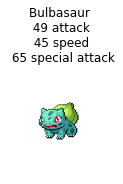

In [216]:
fig, ax = plt.subplots(figsize=(2,2))
img = imread(f"{imageFolderPath}/{weakestPokemon.id}.png")
ax.set_title(f"{weakestPokemon['name']} \n {weakestPokemon.attack} attack \n {weakestPokemon.speed} speed \n {weakestPokemon.sp_attack} special attack")
ax.axis('off')
ax.imshow(img)